In [1]:
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd 
from service.Mfcc import make_mfcc_data

In [7]:
pwd

'/Users/mbassalaev/Desktop/audio_project/Spotter_recognition'

In [8]:
spotter_data = "/Users/mbassalaev/Desktop/spotter_data/"

In [9]:
dir_list = os.listdir(spotter_data)

In [10]:
dir_list

['right',
 'eight',
 'cat',
 'tree',
 'bed',
 'happy',
 'go',
 '.DS_Store',
 'dog',
 'no',
 'wow',
 'nine',
 'left',
 'stop',
 'three',
 '_background_noise_',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'up',
 'marvin',
 'two',
 'house',
 'down',
 'six',
 'yes',
 'on',
 'five',
 'off',
 'four']

In [15]:
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknown_list = []

for label in dir_list:
    if (label not in target_list) and (label != '_background_noise_') and (label != '.DS_Store'):
        unknown_list.append(label)
        
print('target_list = ', target_list)
print('unknown_list = ', unknown_list)

target_list =  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
unknown_list =  ['eight', 'cat', 'tree', 'bed', 'happy', 'dog', 'wow', 'nine', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'marvin', 'two', 'house', 'six', 'five', 'four']


In [16]:
df_target = pd.DataFrame(columns=['word', 'path'])
df_unknown = pd.DataFrame(columns=['word', 'path'])

In [17]:
for word in target_list:
    
    cur_dir_list = os.listdir(spotter_data + '/' + word)
    
    for path in cur_dir_list:
        
        df_target = df_target.append({'word': word, 'path' : spotter_data + word + '/' + path}, ignore_index=True)

df_target.head()

,word,path
0,yes,/Users/mbassalaev/Desktop/spotter_data/yes/988...
1,yes,/Users/mbassalaev/Desktop/spotter_data/yes/93e...
2,yes,/Users/mbassalaev/Desktop/spotter_data/yes/a75...
3,yes,/Users/mbassalaev/Desktop/spotter_data/yes/627...
4,yes,/Users/mbassalaev/Desktop/spotter_data/yes/439...


In [18]:
for word in unknown_list:
    
    cur_dir_list = os.listdir(spotter_data + '/' + word)
    
    for path in cur_dir_list:
        
        df_unknown = df_unknown.append({'word': word, 'path' : spotter_data + word + '/' + path}, ignore_index=True)

df_unknown.head()

,word,path
0,eight,/Users/mbassalaev/Desktop/spotter_data/eight/9...
1,eight,/Users/mbassalaev/Desktop/spotter_data/eight/4...
2,eight,/Users/mbassalaev/Desktop/spotter_data/eight/b...
3,eight,/Users/mbassalaev/Desktop/spotter_data/eight/9...
4,eight,/Users/mbassalaev/Desktop/spotter_data/eight/5...


In [19]:
print('Target words dataframe size = ', df_target.shape)
print('Unknown words dataframe size = ', df_unknown.shape)

Target words dataframe size =  (23682, 2)
Unknown words dataframe size =  (41039, 2)


In [25]:
df_target.to_csv('Target_words_dataframe')
df_unknown.to_csv('Unknown_words_dataframe')
df.to_csv('full_df')

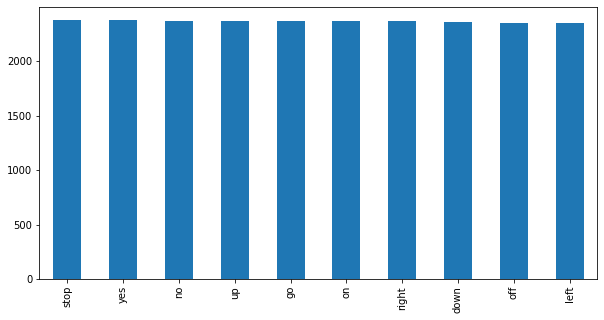

In [21]:
df_target.word.value_counts().plot(kind='bar', figsize=((10, 5)))
plt.savefig("data_hist_1", pad_inches=10)

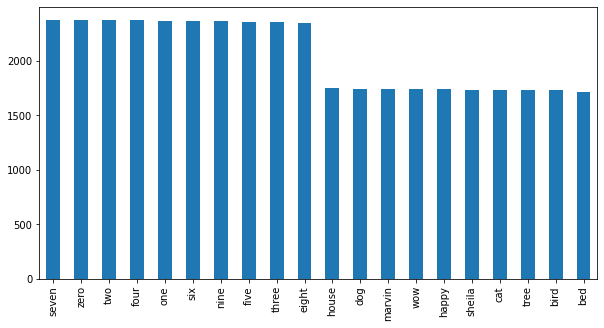

In [22]:
df_unknown.word.value_counts().plot(kind='bar', figsize=((10, 5)))
plt.savefig("data_hist_2", pad_inches=10)

In [2]:
df_target = pd.read_csv('../../Target_words_dataframe')
df_unknown = pd.read_csv('../../Unknown_words_dataframe')
df = pd.read_csv('../../full_df')

In [3]:
df_target = df_target.drop(columns=['Unnamed: 0'], axis=1)
df_unknown = df_unknown.drop(columns=['Unnamed: 0'], axis=1)